In [1]:
## notebookの表示領域広げる
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## 描画できるようにする＆綺麗に描画できるようにする
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'png', 'retina'}

## 自動で時間表示する
%load_ext autotime

## ライブラリのリロードを行えるようにする
%load_ext autoreload

import pandas as pd
import numpy as np

## dataframeの表示を広げる
def disp_full(x, drows=False, dcols=True):
    if drows:
        pd.set_option('display.max_rows', x.shape[0])
    if dcols:
        pd.set_option('display.max_columns', x.shape[1])
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

In [2]:
import os, sys, gc

time: 699 µs


In [3]:
import seaborn as sns

time: 375 ms


In [4]:
from tqdm import tqdm_notebook as tqdm

time: 6.95 ms


In [5]:
from sklearn.metrics import roc_auc_score

time: 336 ms


In [6]:
import lightgbm as lgb

time: 24.4 ms


In [7]:
import shap
shap.initjs()

time: 1.12 s


## make datasets

In [8]:
feature_set = [[100, 1], [101, 1], [102, 1]]

X_train = pd.concat([pd.read_pickle(f'../data/processed/{_feature_num}/{_version}/train.pickle') for _feature_num, _version in feature_set], axis=1)
y_train = pd.read_pickle('../data/processed/000/train.pickle').set_index('ID_code').loc[X_train.index, 'target']

real_id = pd.read_pickle('../data/processed/001/real_id.pickle')
X_test = pd.concat([pd.read_pickle(f'../data/processed/{_feature_num}/{_version}/test.pickle') for _feature_num, _version in feature_set], axis=1)[X_train.columns]
X_test = X_test.loc[real_id]

/home/takuya.akiyama/.pyenv/versions/anaconda3-2018.12/envs/kaggle1/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



time: 25.3 s


In [9]:
X_train.shape

(200000, 1000)

time: 2.68 ms


In [10]:
X_test.shape

(100000, 1000)

time: 3.88 ms


## train and predict

In [11]:
val_pred = np.zeros((50000, 200))

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.9,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.05,
    'max_depth': -1,
    'metric':'binary_logloss',
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 4,
    'num_threads': 32,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': 1}
for cnum in range(200):
    print(cnum)
    trn_data = lgb.Dataset(X_train.filter(regex=f'var_{cnum}$').iloc[:150000], y_train.iloc[:150000], free_raw_data=False)
    val_data = lgb.Dataset(X_train.filter(regex=f'var_{cnum}$').iloc[150000:], y_train.iloc[150000:], free_raw_data=False)
    clf = lgb.train(param, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=-1, early_stopping_rounds=100)
    val_pred[:, cnum] = clf.predict(X_train.filter(regex=f'var_{cnum}$').iloc[150000:])

0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[137]	training's binary_logloss: 0.322922	valid_1's binary_logloss: 0.325496
1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[113]	training's binary_logloss: 0.323274	valid_1's binary_logloss: 0.325216
2
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[128]	training's binary_logloss: 0.322649	valid_1's binary_logloss: 0.32497
3
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[96]	training's binary_logloss: 0.325215	valid_1's binary_logloss: 0.327783
4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[105]	training's binary_logloss: 0.325228	valid_1's binary_logloss: 0.327849
5
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[275]	training's 

Early stopping, best iteration is:
[106]	training's binary_logloss: 0.325201	valid_1's binary_logloss: 0.327847
47
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.325222	valid_1's binary_logloss: 0.3278
48
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.32443	valid_1's binary_logloss: 0.327134
49
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[105]	training's binary_logloss: 0.324091	valid_1's binary_logloss: 0.326855
50
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.324741	valid_1's binary_logloss: 0.327732
51
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.324294	valid_1's binary_logloss: 0.326875
5

Early stopping, best iteration is:
[121]	training's binary_logloss: 0.324305	valid_1's binary_logloss: 0.3271
94
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[103]	training's binary_logloss: 0.323085	valid_1's binary_logloss: 0.326309
95
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	training's binary_logloss: 0.324152	valid_1's binary_logloss: 0.326834
96
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[104]	training's binary_logloss: 0.325263	valid_1's binary_logloss: 0.327868
97
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[105]	training's binary_logloss: 0.324827	valid_1's binary_logloss: 0.327732
98
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	training's binary_logloss: 0.325318	valid_1's binary_logloss: 0.327963


Early stopping, best iteration is:
[111]	training's binary_logloss: 0.320744	valid_1's binary_logloss: 0.322256
140
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.325168	valid_1's binary_logloss: 0.327713
141
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	training's binary_logloss: 0.324113	valid_1's binary_logloss: 0.327073
142
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.32484	valid_1's binary_logloss: 0.327704
143
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.325124	valid_1's binary_logloss: 0.327943
144
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.324873	valid_1's binary_logloss: 0.3

Early stopping, best iteration is:
[103]	training's binary_logloss: 0.325294	valid_1's binary_logloss: 0.327985
186
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.324652	valid_1's binary_logloss: 0.327019
187
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	training's binary_logloss: 0.324719	valid_1's binary_logloss: 0.327358
188
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.323926	valid_1's binary_logloss: 0.32692
189
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[104]	training's binary_logloss: 0.32524	valid_1's binary_logloss: 0.327926
190
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[121]	training's binary_logloss: 0.322649	valid_1's binary_logloss: 0.32

In [12]:
roc_auc_score(y_train.iloc[150000:], val_pred.prod(axis=1))

0.922055680875676

time: 45 ms


In [14]:
params = {
    'bagging_freq': 5,
    'bagging_fraction': 0.9,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.05,
    'max_depth': -1,
    'metric':'binary_logloss',
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 4,
    'num_threads': 32,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': 1}

oof_pred_array = np.ones((200000, 200))
test_pred_array = np.ones((100000, 5, 200))
for cnum in range(200):
    print(f'cnum:{cnum}')
    train_dset = lgb.Dataset(X_train.filter(regex=f'var_{cnum}$'), y_train, free_raw_data=False)
    cv_result, bsts = lgb.cv(params, train_set=train_dset, num_boost_round=100000, early_stopping_rounds=100, stratified=True)

    best_iteration = bsts.best_iteration
    for i, bst in enumerate(bsts.boosters):
        # oofの予測
        cv_valid_index = bst.valid_sets[0].used_indices
        cv_valid_data = train_dset.data.iloc[cv_valid_index]
        oof_pred_array[cv_valid_index, cnum] = bst.predict(cv_valid_data, num_iteration=best_iteration)
        # testの予測
        test_pred_array[:, i, cnum] = bst.predict(X_test.filter(regex=f'var_{cnum}$'), num_iteration=best_iteration)
    print('\tauc : {0:.6f}'.format(roc_auc_score(y_train, oof_pred_array[:, cnum])))
    print('\tauc : {0:.6f}'.format(roc_auc_score(y_train, oof_pred_array.prod(axis=1))))

cnum:0
	auc : 0.544174
	auc : 0.544174
cnum:1
	auc : 0.544530
	auc : 0.571951
cnum:2
	auc : 0.550648
	auc : 0.595775
cnum:3
	auc : 0.508366
	auc : 0.597331
cnum:4
	auc : 0.505731
	auc : 0.597452
cnum:5
	auc : 0.526575
	auc : 0.606299
cnum:6
	auc : 0.559928
	auc : 0.626734
cnum:7
	auc : 0.497958
	auc : 0.626000
cnum:8
	auc : 0.519704
	auc : 0.628154
cnum:9
	auc : 0.542107
	auc : 0.638683
cnum:10
	auc : 0.497003
	auc : 0.638377
cnum:11
	auc : 0.517526
	auc : 0.640696
cnum:12
	auc : 0.560036
	auc : 0.657946
cnum:13
	auc : 0.553539
	auc : 0.669173
cnum:14
	auc : 0.504508
	auc : 0.669182
cnum:15
	auc : 0.515336
	auc : 0.670026
cnum:16
	auc : 0.504264
	auc : 0.669939
cnum:17
	auc : 0.495481
	auc : 0.669455
cnum:18
	auc : 0.535906
	auc : 0.676940
cnum:19
	auc : 0.509957
	auc : 0.677908
cnum:20
	auc : 0.515785
	auc : 0.679631
cnum:21
	auc : 0.556075
	auc : 0.690160
cnum:22
	auc : 0.551843
	auc : 0.699662
cnum:23
	auc : 0.521357
	auc : 0.701010
cnum:24
	auc : 0.527318
	auc : 0.703080
cnum:25
	a

In [15]:
cv_index_list = []
for i, bst in enumerate(bsts.boosters):
    train_index = bst.train_set.used_indices
    valid_index = bst.valid_sets[0].used_indices
    cv_index_list.append([train_index, valid_index])

time: 4.67 ms


In [16]:
model_number = 904
model_output_save_dir = f'../data/processed/{model_number}'
if not os.path.isdir(model_output_save_dir):
    os.makedirs(model_output_save_dir)

pd.DataFrame(oof_pred_array, index=X_train.index, columns=[f'pred_{i}' for i in range(200)])\
    .to_pickle(os.path.join(model_output_save_dir, 'oof_preds.pkl.gz'), compression='gzip')
pd.DataFrame(cv_index_list, columns=['train_index', 'valid_index'])\
    .to_pickle(os.path.join(model_output_save_dir, 'cv_index.pkl.gz'), compression='gzip')
pd.to_pickle(test_pred_array, os.path.join(model_output_save_dir, 'test_pred_array.pickle'))

time: 49.6 s


In [17]:
roc_auc_score(y_train, oof_pred_array.prod(axis=1))

0.9173994030732442

time: 170 ms


In [18]:
roc_auc_score(y_train, (9 * oof_pred_array / (1 - oof_pred_array)).prod(axis=1))

0.9180376719825322

time: 250 ms


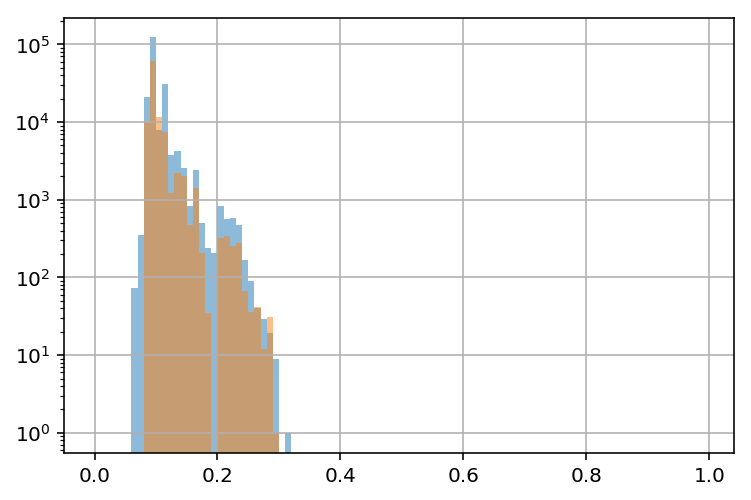

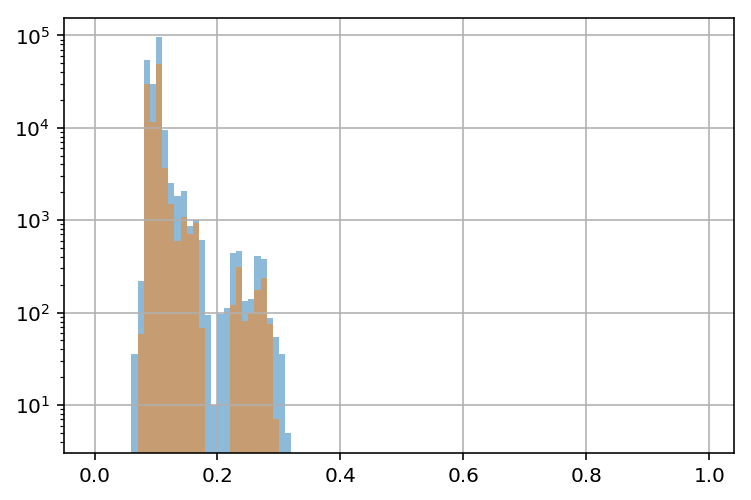

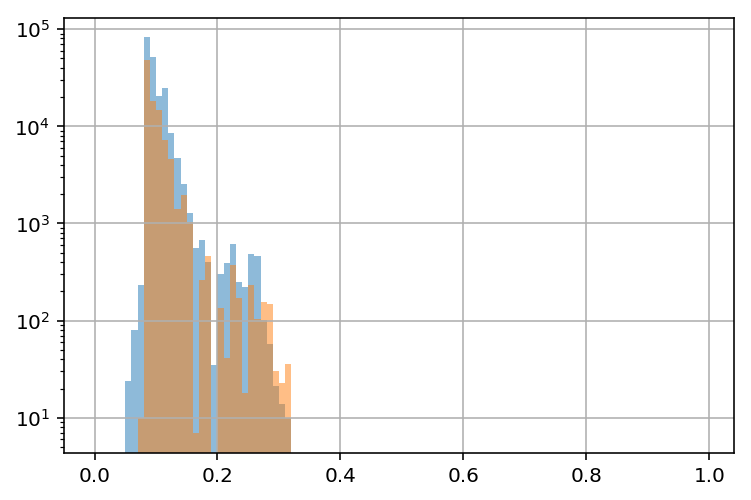

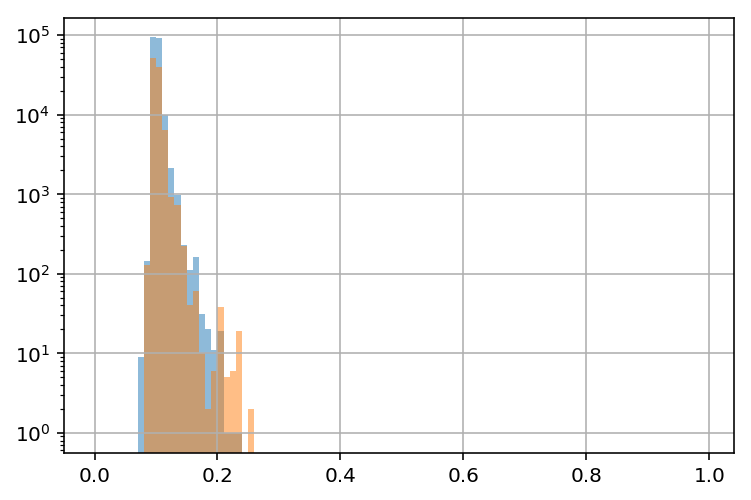

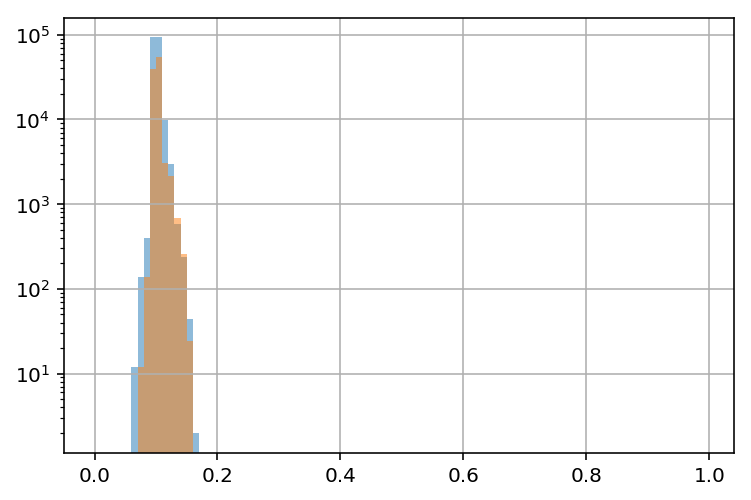

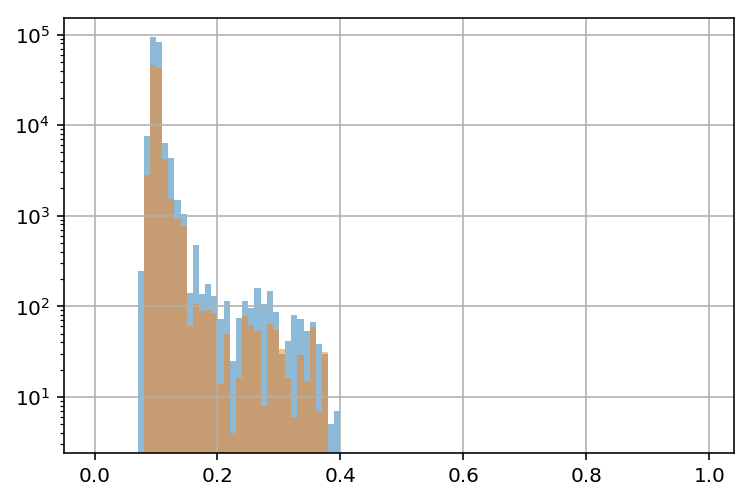

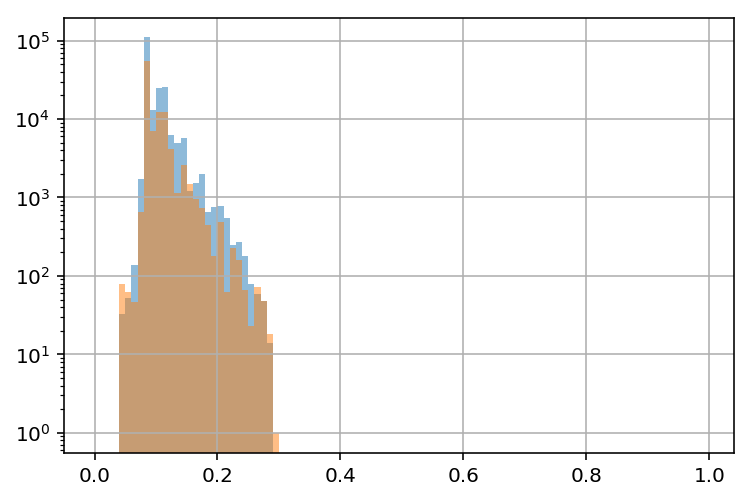

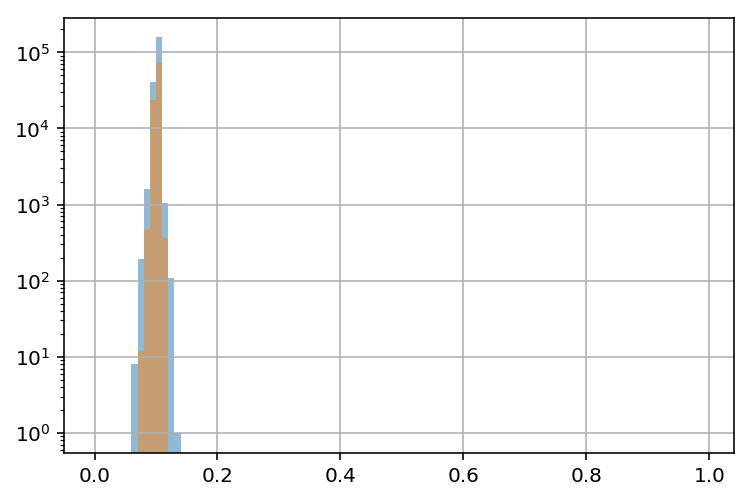

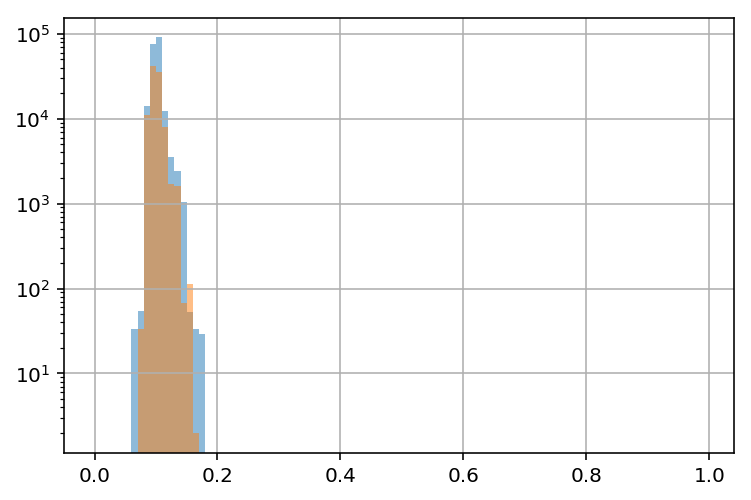

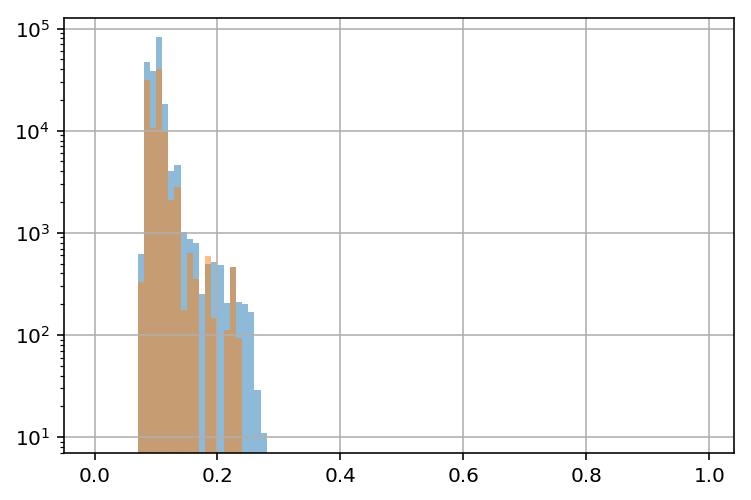

time: 9.88 s


In [20]:
for c in range(10):
    pd.Series(oof_pred_array[:, c]).hist(bins=np.arange(0, 1, 0.01), alpha=0.5)
    ax = pd.Series(test_pred_array[:, 0, c]).hist(bins=np.arange(0, 1, 0.01), alpha=0.5)
    ax.set_yscale('log')
    plt.show()

In [19]:
thr = 0.505
oof_pred_prod = np.ones((200000))
oof_pred_odds_prod = np.ones((200000))
test_pred_odds_prod = np.ones((100000, 5))
for cnum in tqdm(range(200)):
    tmp_auc = roc_auc_score(y_train, oof_pred_array[:, cnum])
    if tmp_auc >= thr:
        oof_pred_prod *= oof_pred_array[:, cnum]
        oof_pred_odds_prod *= 9 * oof_pred_array[:, cnum] / (1 - oof_pred_array[:, cnum])
        test_pred_odds_prod *= 9 * test_pred_array[:,:, cnum] / (1 - test_pred_array[:,:, cnum])
print('raw prod auc : {0:.6f}'.format(roc_auc_score(y_train, oof_pred_prod)))
print('odds prod auc : {0:.6f}'.format(roc_auc_score(y_train, oof_pred_odds_prod)))


raw prod auc : 0.918676
odds prod auc : 0.919214
time: 21.2 s


In [23]:
oof_pred = pd.DataFrame({'pred':oof_pred_odds_prod, 'label':y_train}, index=y_train.index)
test_pred = pd.DataFrame(test_pred_odds_prod, index=X_test.index, columns=[f'fold_{i}' for i in range(5)])

time: 4.92 ms


Text(0.5, 1.0, 'test prediction')

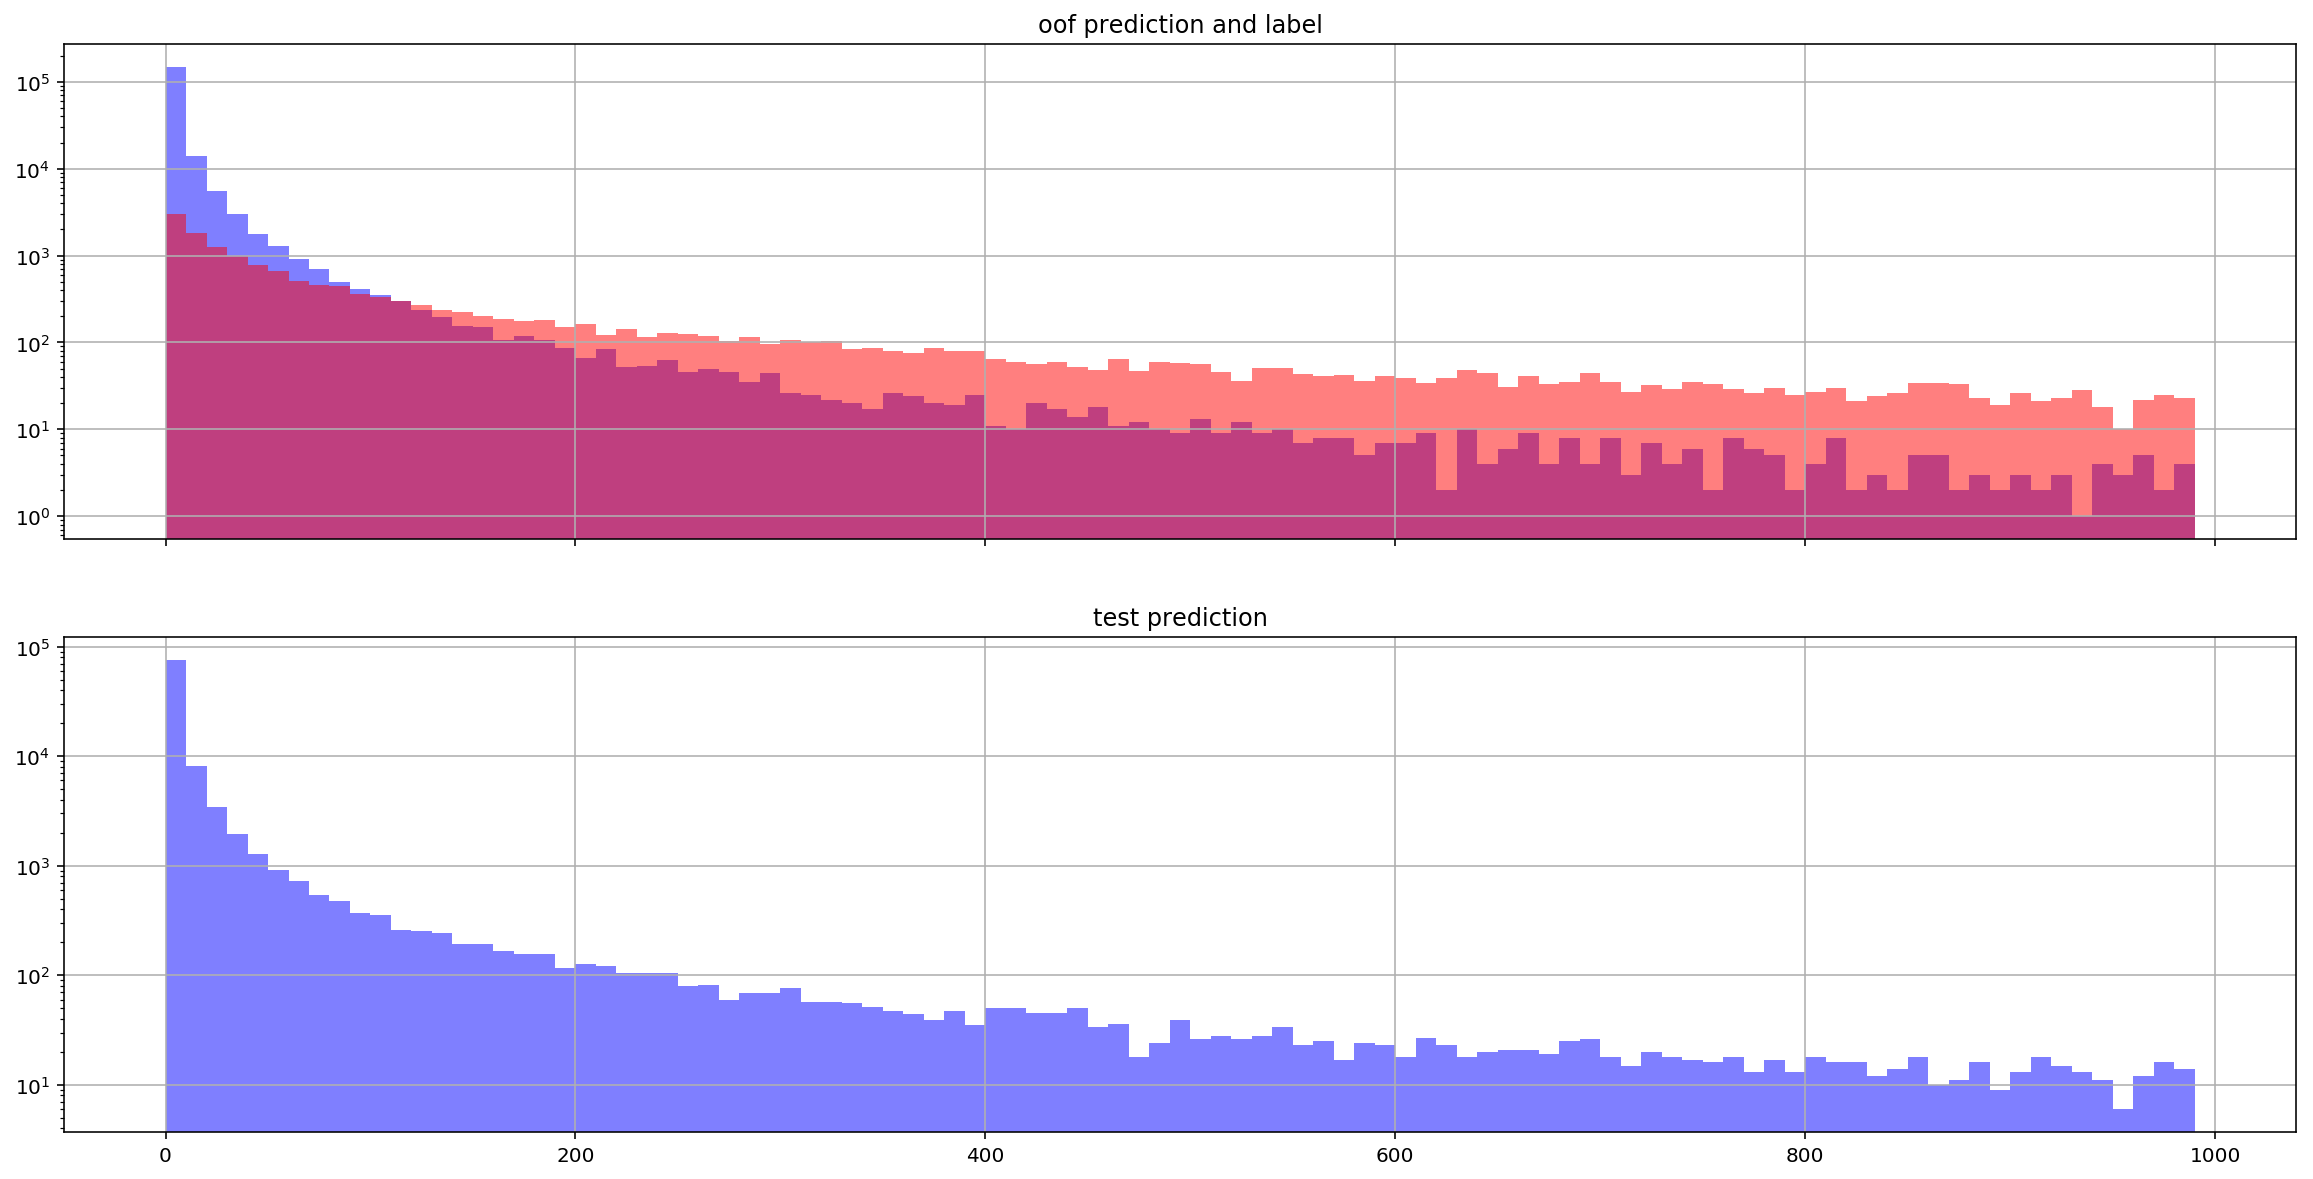

time: 2.43 s


In [27]:
bins=np.arange(0, 1000, 10) #np.arange(-0.1, 1.1, 0.01)

fig, axs = plt.subplots(2, 1, figsize=(20,10), sharex=True)
ax = axs[0]
oof_pred.query('label==0')['pred'].hist(bins = bins, ax=ax, color='b', alpha=0.5)
oof_pred.query('label==1')['pred'].hist(bins = bins, ax=ax, color='r', alpha=0.5)
ax.set_yscale('log')
ax.set_title('oof prediction and label')
ax = axs[1]
test_pred.mean(axis=1).hist(bins = bins, ax=ax, color='b', alpha=0.5)
ax.set_yscale('log')
ax.set_title('test prediction')

## submit

In [28]:
sub = pd.read_pickle('../data/processed/000/sample_submission.pickle')

time: 55.1 ms


In [32]:
sub = sub[['ID_code']].merge((test_pred.rank()/test_pred.shape[0]).mean(axis=1).reset_index(name='target')\
                             .rename(columns={'index':'ID_code'}), how='left').fillna(0)

time: 351 ms


In [33]:
sub.head()

,ID_code,target
0,test_0,0.000000
1,test_1,0.000000
2,test_2,0.000000
3,test_3,0.857046
4,test_4,0.000000


time: 8.76 ms


In [35]:
if not os.path.isdir('../data/out'):
    os.makedirs('../data/out')
sub.to_csv(f'../data/out/{model_number}_lgb.csv.gz', index=False, compression='gzip')

time: 1.51 s


In [37]:
pd.read_csv('../data/out/904_lgb.csv.gz').set_index('ID_code')['target'].corr(
    pd.read_csv('../data/out/901_lgb.csv.gz').set_index('ID_code')['target'], method='spearman')

0.9932811901530139

time: 456 ms


In [38]:
pd.read_csv('../data/out/904_lgb.csv.gz').set_index('ID_code')['target'].corr(
    pd.read_csv('../data/external/lgb_sub_hrd_0404_2.csv').set_index('ID_code')['target'], method='spearman')

0.9962279824356992

time: 436 ms


In [39]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f ../data/out/904_lgb.csv.gz -m 'cv:0.919214'

100%|████████████████████████████████████████| 960k/960k [00:00<00:00, 3.57MB/s]
Successfully submitted to Santander Customer Transaction Predictiontime: 3.35 s
